# 1. Loading Modules

In [3]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import networkx as nx
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from scipy import stats

# 2. Erdös-Renyi Random Graph Model

## 2.1 Model Parameters 
prob - Probability of an Edge occuring   
N - Number of Nodes


In [2]:
def Erdos_Renyi(prob,N=50):
    """
    Simulating Erdos_Renyi Random Graph Model
    
    Parameters
    ----------
    prob: int between [0,1] 
        Probability of an Edge occuring
    N: int
        Number of Nodes Of Graph
    
    Returns
    -------
    G - Graph Data Structure
    """
    ## Creating the Adjacency Matrix
    Adj = np.random.choice(2,(N,N),p=[1-prob,prob])

    ## Create Node Matrix
    nodes = np.arange(N)
    
    ## Construct Matrix from networkx module
    G = nx.from_numpy_matrix(Adj)
    G.add_nodes_from(np.arange(N))
    
    ## Return Graph
    return G    

In [3]:
class values_input():
    def __init__(self, 
                 prob = "e.g. '0.2'", 
                 N = "e.g. '10'"                  
                ):
        self.prob = widgets.Text(description = 'Prob',value = prob)
        self.N = widgets.Text(description = 'No: of Nodes',value = N)
        self.prob.on_submit(self.handle_submit)
        self.prob.on_submit(self.handle_submit)
        display(self.prob, self.N)

    def handle_submit(self, text):
        self.v = text.value
        return self.v
    
print("Enter the values for the variables in the following fields")
f = values_input()

Enter the values for the variables in the following fields


Text(value="e.g. '0.2'", description='Prob')

Text(value="e.g. '10'", description='No: of Nodes')

In [23]:

print("Values Inputed: " ,f.prob.value, f.N.value)


Values Inputed:  0.2 20


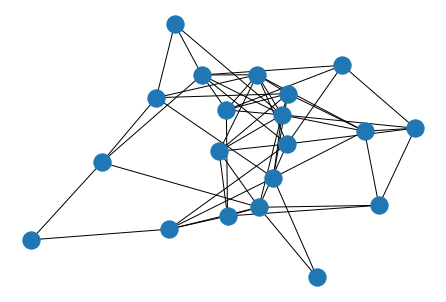

In [24]:
# Constructing Graph Network
G = Erdos_Renyi(float(f.prob.value),int(f.N.value))

# Drawing Graph
nx.draw(G)
show_inline_matplotlib_plots()

## 2.2 Estimating Model Parameters


In [10]:
Adj = nx.adjacency_matrix(G)
p = float(f.prob.value)
N = len(list(G.nodes))

### 2.2.1 Average Node Degree in Graph

The Average Degree of a Node in the Erdos-Renyi Model is given by *prob(N-1)*. 

In [11]:
## Finding Average Degree from Adjacency
A_sum = Adj.sum(axis=1)
Avg_degree = np.average(A_sum)
print("Average Degree calculated from Graph:",Avg_degree)

## Finding Through Formula
Avg_degree_formula = p * (N-1)
print("Average Degree calculated from Formula:" ,Avg_degree_formula)

Average Degree calculated from Graph: 12.25
Average Degree calculated from Formula: 7.6000000000000005


### 2.2.2 Diameter of Graph

The Diameter of the Graph in the Erdos-Renyi Model is given by *log(N)/log(z)*. *z* is the average node degree in the graph.


In [12]:
## Finding from Graph
diameter = nx.diameter(G)
print("Diameter of the Graph calculated from Graph:",diameter)

## Finding Through Formula
diameter_formula = np.log(N) / np.log(Avg_degree)
print("Diameter of the Graph calculated from Formula:" ,diameter_formula)

Diameter of the Graph calculated from Graph: 2
Diameter of the Graph calculated from Formula: 1.1956500746314433


### 2.2.3 Clustering Coefficient

The Clustering Coefficient for the Erdos-Renyi Model is given by *prob*.

In [14]:
## Finding from Graph
ccoeff = nx.average_clustering(G)
print("Clustering Coefficient calculated from Graph:",ccoeff)

## Finding Through Formula
print("Clustering Coefficient calculated from Formula:" ,p)

Clustering Coefficient calculated from Graph: 0.5851126651126652
Clustering Coefficient calculated from Formula: 0.4


## 2.3 Python In-built function

The Networkx module also contains an in-built function that can be used directly to generate Erdös-Renyi Random Graph Models.

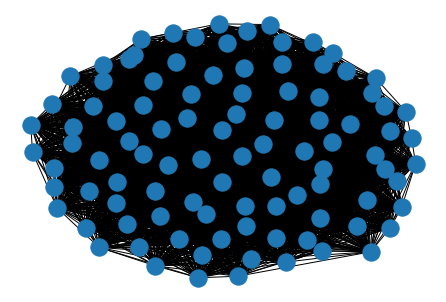

In [22]:
G2 = nx.erdos_renyi_graph(int(f.N.value),float(f.prob.value),seed=23,directed=False)

# Drawing Graph
nx.draw(G)
show_inline_matplotlib_plots()

## 2.4 Analysis of Model Parameters


In [17]:
# Average Degree Analysis for various graphs
Avg_degree = []
diameter = []
ccoeff = []
upper_limit = 100

# Pre-determined Probability Value
p = 0.5


for i in range(2,upper_limit):
    # Constructing Graph Network    
    G = Erdos_Renyi(p,i)
    Adj = nx.adjacency_matrix(G)
    ## Finding Average Degree from Adjacency
    A_sum = Adj.sum(axis=1)
    Avg_degree.append(np.average(A_sum))
    ## Finding Diameter from Graph
    diameter.append(nx.diameter(G))
    ## Finding Clustering Coeffcient from Graph
    ccoeff.append(nx.average_clustering(G))


### 2.4.1 Average Node Degree in Graph

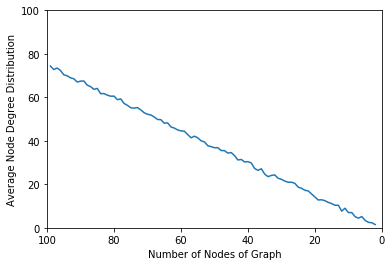

In [18]:
# Plotting
plt.plot(np.arange(2,upper_limit),Avg_degree)
plt.ylabel("Average Node Degree Distribution")
plt.xlabel("Number of Nodes of Graph")
plt.axis([upper_limit,0,0,upper_limit])
plt.show()

### 2.4.2 Diameter of Graph

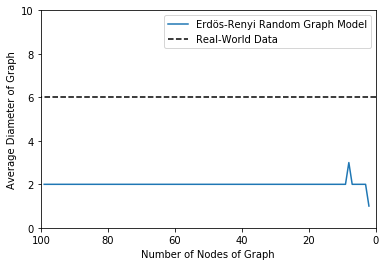

In [19]:
# Plotting
plt.plot(np.arange(2,upper_limit),diameter)
plt.hlines(6,0,upper_limit,linestyle="dashed")
plt.ylabel("Average Diameter of Graph")
plt.xlabel("Number of Nodes of Graph")
plt.legend(labels=["Erdös-Renyi Random Graph Model", "Real-World Data"])
plt.axis([upper_limit,0,0,10])
plt.show()

### 2.4.3 Clustering Coefficient

[100, 0, 0, 1]

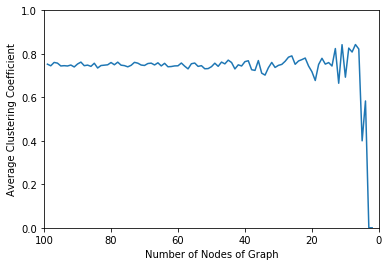

In [20]:
# Plotting
plt.plot(np.arange(2,upper_limit),ccoeff)
plt.ylabel("Average Clustering Coefficient")
plt.xlabel("Number of Nodes of Graph")
plt.axis([upper_limit,0,0,1])

# 3. Planned Partition Model

## 3.1 Model Parameters
*z - probability of being in Community 1* 

*p - same community nodes - edge probability*

*q - different community nodes -  edge probability*

In [ ]:
def Planned_Partition_Model(z=0.5,p=0.6,q=0.2,N=20):
    """
    Simulating Planned Partition Graph Model
    
    Parameters
    ----------
    z: float between [0,1] 
        Probability of a Node belonging to community 1
    p: float between [0,1] 
        Probability of an Edge occuring between nodes of the same community
    q: float between [0,1] 
        Probability of an Edge occuring between nodes of the different community    
    N: int
        Number of Nodes Of Graph
    
    Returns
    -------
    G - Graph Data Structure
    """    
    ## Create Node Matrix
    nodes = np.arange(N)
    ## Defining Colour Map of Nodes
    color_map = []
    Adj = np.eye(N)
    
    ## Distributing Nodes into the two communities
    community = np.random.choice(2, size = N, p=[1 - z, z])
    
    ## Creating Colour Map
    for n in nodes:
        if community[n] == 0:
            color_map.append('blue')
        elif community[n] == 1:
            color_map.append('green') 
            
    ## Splitting into individual communities
    community = community.astype(bool)
    community0 = nodes[~community]
    community1 = nodes[community]
            
    ## Creating the Adjacency Matrix
    for i in community0:
        for j in community0:
            Adj[i,j] = np.random.choice(2,1,p=[1-p,p])
            
    for i in community1:
        for j in community1:
            Adj[i,j] = np.random.choice(2,1,p=[1-p,p])
            
    for i in community0:
        for j in community1:
            Adj[i,j] = np.random.choice(2,1,p=[1-q,q])
            Adj[j,i] = Adj[i,j]
    
    ## Construct Matrix from networkx module
    G = nx.from_numpy_matrix(Adj)
    G.add_nodes_from(np.arange(N))
    
    ## Return Graph and colour map
    return G,color_map

In [ ]:
class values_input():
    def __init__(self, 
                 prob_z = "e.g. '0.5'", 
                 prob_p = "e.g. '0.2'", 
                 prob_q = "e.g. '0.32'",
                 N = "e.g. '10'"                  
                ):
        self.prob_z = widgets.Text(description = 'Prob - z',value = prob_z)
        self.prob_p = widgets.Text(description = 'Prob - p',value = prob_p)
        self.prob_q = widgets.Text(description = 'Prob - q',value = prob_q)
        self.N = widgets.Text(description = 'No: of Nodes',value = N)
        self.prob_p.on_submit(self.handle_submit)
        self.prob_p.on_submit(self.handle_submit)
        self.prob_p.on_submit(self.handle_submit)
        self.prob_p.on_submit(self.handle_submit)
        display(self.prob_z, self.prob_p, self.prob_q, self.N)

    def handle_submit(self, text):
        self.v = text.value
        return self.v
    
print("Enter the values for the variables in the following fields")
f = values_input()

In [ ]:
print("Values Inputed: " ,f.prob_z.value + ",", f.prob_p.value + ",", f.prob_q.value + ",", f.N.value)

In [ ]:
# Constructing Graph Network
G,colour_map = Planned_Partition_Model(float(f.prob_z.value),float(f.prob_p.value),
                                       float(f.prob_q.value),int(f.N.value))

# Drawing Graph
nx.draw(G,node_color=colour_map)
show_inline_matplotlib_plots()

# 4. Stochastic Block Model

## 4.1 Model Parameters

**z** = [z<sub>1</sub>, z<sub>2</sub>, .. z<sub>N</sub>] - z<sub>k</sub> denotes the probability of node belonging to community k

**$\eta$** - edge probability matrix with $\eta$<sub>ij</sub> denoting the probability of an edge between community i node and a community j node

**N** - Number of nodes in the graph

In [4]:
def Stochastic_Block_Model(z,eta,N):
    """
    Simulating Stochastic Block Graph Model
    
    Parameters
    ----------
    z:   numpy of floats between [0,1] summing to 1
         Shape - (Num_communities,)
         Probability of a Node belonging to community index i    
    eta: numpy of floats between [0,1] 
         Shape - (Num_communities,Num_communities)
         Probability of an Edge occuring between nodes of different communities
    N:   int
         Number of Nodes Of Graph
    
    Returns
    -------
    G - Graph Data Structure
    """    
    ## Create Node Matrix
    nodes = np.arange(N)
    ## Defining Colour Map of Nodes
    color_map = []
    Adj = np.eye(N)
    
    ## Distributing Nodes into the communities
    community = np.random.choice(len(z), size = N, p=z)
    
    ## Creating Colour Map
    color_map = np.asarray([n for n in community])      
    
            
    ## Creating the Adjacency Matrix
    for i in community:
        for j in community:
            p = eta[i,j]
            Adj[i,j] = np.random.choice(2,1,p=[1-p,p]) 
    
    ## Construct Matrix from networkx module
    G = nx.from_numpy_matrix(Adj)
    G.add_nodes_from(np.arange(N))
    
    ## Return Graph and colour map
    return G,color_map

In [5]:
# Defining Parameters

## Number of Nodes
N = 45
## z Vector
z = [0.33, 0.33, 0.34]
z = np.asarray(z)
## eta Matrix Parameters
eta = [[0.4, 0.25, 0.25],[ 0.25, 0.4, 0.25], [0.25, 0.25, 0.4]]
eta = np.asarray(eta)

In [6]:
community = np.random.choice(len(z), size = N, p=z)
Adj = np.eye(N)
print(community)
     

[2 1 0 1 0 0 0 1 0 0 1 1 0 1 0 2 1 1 0 0 0 2 0 2 0 0 0 0 1 1 1 0 1 1 1 0 2
 2 2 1 2 1 1 0 2]


In [9]:
## Creating the Adjacency Matrix
for i in range(len(community)):
    for j in range(len(community)):
        p = eta[community[i],community[j]]
        print(p)
        Adj[i,j] = np.random.choice(2,1,p=[1-p,p]) 
        
print(Adj)

0.4
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.4
0.25
0.25
0.25
0.25
0.25
0.4
0.25
0.4
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.4
0.4
0.4
0.25
0.4
0.25
0.25
0.25
0.4
0.25
0.4
0.25
0.4
0.25
0.25
0.25
0.4
0.25
0.25
0.4
0.4
0.25
0.4
0.25
0.25
0.4
0.4
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.4
0.4
0.4
0.25
0.4
0.4
0.4
0.25
0.25
0.25
0.25
0.4
0.25
0.4
0.4
0.25
0.25
0.25
0.25
0.4
0.25
0.4
0.4
0.4
0.25
0.4
0.4
0.25
0.25
0.4
0.25
0.4
0.25
0.25
0.25
0.4
0.4
0.4
0.25
0.4
0.25
0.4
0.4
0.4
0.4
0.25
0.25
0.25
0.4
0.25
0.25
0.25
0.4
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.4
0.25
0.25
0.4
0.25
0.4
0.25
0.25
0.25
0.4
0.25
0.25
0.4
0.4
0.25
0.4
0.25
0.25
0.4
0.4
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.4
0.4
0.4
0.25
0.4
0.4
0.4
0.25
0.25
0.25
0.25
0.4
0.25
0.4
0.4
0.25
0.25
0.25
0.25
0.4
0.25
0.4
0.4
0.4
0.25
0.4
0.4
0.25
0.25
0.4
0.25
0.4
0.25
0.25
0.25
0.4
0.4
0.4
0.25
0.4
0.25
0.4
0.4
0.4
0.4
0.25
0.25
0.25
0.4
0.25
0.25
0.25
0.4


0.4
0.25
0.4
0.4
0.4
0.4
0.25
0.25
0.25
0.4
0.25
0.25
0.25
0.4
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.4
0.25
0.4
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.4
0.25
0.25
0.25
0.25
0.25
0.4
0.25
0.4
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.4
0.4
0.4
0.25
0.4
0.25
0.25
0.25
0.4
[[1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
g = np.array([2,3,4,5,6,2,3])

(array([ 2,  4,  5,  6,  8,  9, 12, 14, 18, 19, 20, 22, 24, 25, 26, 27, 31,
       35, 43]),)
(array([ 1,  3,  7, 10, 11, 13, 16, 17, 28, 29, 30, 32, 33, 34, 39, 41, 42]),)
(array([ 0, 15, 21, 23, 36, 37, 38, 40, 44]),)


In [43]:
## Construct Matrix from networkx module
G = nx.from_numpy_matrix(Adj)
G.add_nodes_from(np.arange(N))

## Creating Colour Map
color_map = np.asarray([n for n in community])  

## Drawing Parameters
super_list = []

for i in range(len(z)):
    sub = np.where(community == i)
    print(list(sub))
    super_list.append(sub)

super_list = tuple(super_list)
print(type(super_list))
positions = nx.shell_layout(G,nlist= super_list)
# Drawing Graph

nx.draw(G,node_color=colour_map,pos = positions )
show_inline_matplotlib_plots()

[array([ 2,  4,  5,  6,  8,  9, 12, 14, 18, 19, 20, 22, 24, 25, 26, 27, 31,
       35, 43])]
[array([ 1,  3,  7, 10, 11, 13, 16, 17, 28, 29, 30, 32, 33, 34, 39, 41, 42])]
[array([ 0, 15, 21, 23, 36, 37, 38, 40, 44])]
<class 'tuple'>


TypeError: unhashable type: 'numpy.ndarray'